In [1]:
from google.colab import files
uploaded = files.upload()  # select goemotions_cleaned.zip


Saving goemotions_cleaned (1).zip to goemotions_cleaned (1).zip


In [2]:
!unzip goemotions_cleaned.zip -d /content/


Archive:  goemotions_cleaned.zip
   creating: /content/content/goemotions_cleaned/
  inflating: /content/content/goemotions_cleaned/dataset_dict.json  
   creating: /content/content/goemotions_cleaned/train/
  inflating: /content/content/goemotions_cleaned/train/data-00000-of-00001.arrow  
  inflating: /content/content/goemotions_cleaned/train/state.json  
  inflating: /content/content/goemotions_cleaned/train/dataset_info.json  
   creating: /content/content/goemotions_cleaned/validation/
  inflating: /content/content/goemotions_cleaned/validation/data-00000-of-00001.arrow  
  inflating: /content/content/goemotions_cleaned/validation/state.json  
  inflating: /content/content/goemotions_cleaned/validation/dataset_info.json  
   creating: /content/content/goemotions_cleaned/test/
  inflating: /content/content/goemotions_cleaned/test/data-00000-of-00001.arrow  
  inflating: /content/content/goemotions_cleaned/test/state.json  
  inflating: /content/content/goemotions_cleaned/test/datase

In [3]:
from datasets import load_from_disk

dataset = load_from_disk("/content/content/goemotions_cleaned")

print(dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
        num_rows: 168980
    })
    validation: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', '

In [6]:
import pandas as pd

expected_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
    'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]

for split in ["train", "validation", "test"]:
    df = pd.DataFrame(dataset[split])
    cols = set(df.columns)
    missing = [c for c in expected_labels if c not in cols]
    extra = [c for c in cols if c in expected_labels and c not in expected_labels]
    print(f"{split.upper()}:")
    print("  Missing labels:", missing if missing else "None ✅")
    print("  Total samples:", len(df))
    print()


TRAIN:
  Missing labels: None ✅
  Total samples: 168980

VALIDATION:
  Missing labels: None ✅
  Total samples: 21122

TEST:
  Missing labels: None ✅
  Total samples: 21123



In [5]:
dataset['train'][0:5]

{'text': ['on a college campus surrounded by undergrads. i feel old.',
  'probably more like she identified [name]. you have no proof she saw [name] so stop being fake and acting like you know what she saw.',
  'so what you’re saying is that the frogs used to use the chemicals on us? oh, how the tables have turned.',
  "that's literally not me, and he did not say anything about skin",
  'wonder how much meth it would cost to get the dentist to give him a new tooth?'],
 'id': ['eeq4e9t', 'eekzbev', 'ee91cos', 'ee5oor0', 'edvaxk1'],
 'author': ['bustysteclair',
  '[deleted]',
  'Watplr',
  'AdamsTanks',
  'grannygogo'],
 'subreddit': ['Cardinals',
  'freefolk',
  'vaxxhappened',
  'CapitalismVSocialism',
  'loveafterlockup'],
 'link_id': ['t3_ailee4', 't3_ai2qpx', 't3_agqoe1', 't3_ag4gc6', 't3_af265z'],
 'parent_id': ['t3_ailee4',
  't1_eekvdur',
  't1_ee90ll1',
  't1_ee5do86',
  't1_eduzmjk'],
 'created_utc': [1548196992.0,
  1548030848.0,
  1547698560.0,
  1547595648.0,
  1547269248.0]

In [7]:
for split in ["train", "validation", "test"]:
    df = pd.DataFrame(dataset[split])
    missing = [label for label in expected_labels if label not in df.columns]
    extra = [col for col in df.columns if col in expected_labels and col not in expected_labels]

    if missing:
        print(f"⚠️ {split.upper()} split is MISSING these labels: {missing}")
    else:
        print(f"✅ {split.upper()} split has all {len(expected_labels)} labels.")


✅ TRAIN split has all 28 labels.
✅ VALIDATION split has all 28 labels.
✅ TEST split has all 28 labels.


neutral           44221
approval          14106
admiration        13715
annoyance         10912
gratitude          9297
disapproval        9240
curiosity          7735
amusement          7341
realization        7010
optimism           6992
disappointment     6841
love               6534
anger              6477
joy                6382
confusion          5873
sadness            5412
caring             4770
excitement         4505
surprise           4442
disgust            4216
desire             3012
fear               2579
remorse            2047
embarrassment      2001
nervousness        1454
pride              1031
relief             1028
grief               516
dtype: int64


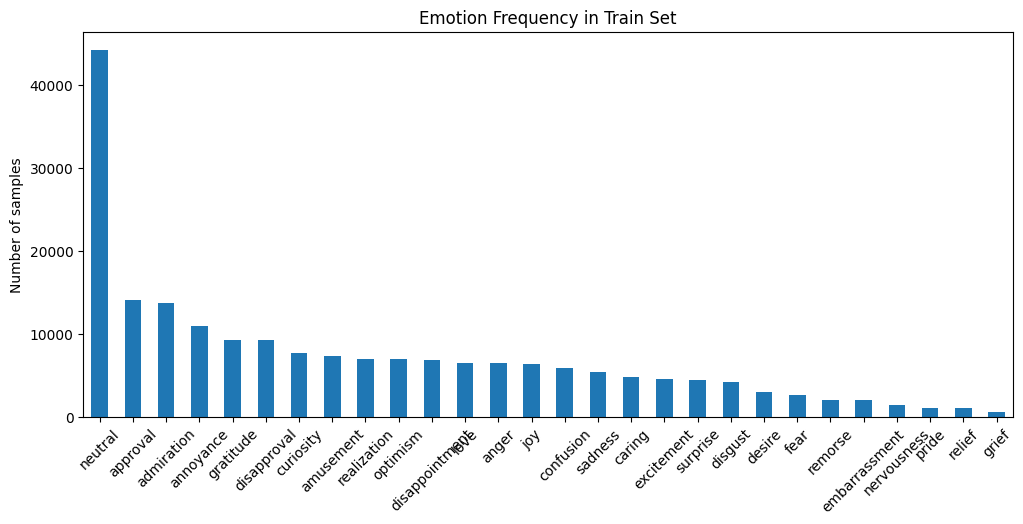

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.DataFrame(dataset['train'])
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
            'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
            'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
            'sadness', 'surprise', 'neutral']
label_cols = emotions

# Count number of samples per emotion
emotion_counts = train_df[label_cols].sum().sort_values(ascending=False)
print(emotion_counts)

# Bar plot
plt.figure(figsize=(12,5))
emotion_counts.plot(kind='bar')
plt.title("Emotion Frequency in Train Set")
plt.ylabel("Number of samples")
plt.xticks(rotation=45)
plt.show()


In [9]:
!pip3 install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=5b005d32fb7569c002dae5212a7c9bc74dc338cd6ca657f590dbf1ec0d02d9ca
  Stored in directory: /root/.cache/pip/wheels/0d/bf/a2/536017b4a6232aef0fb92831af35facd6590c0af0f3983f63b
Successfully built emoji


In [11]:
from transformers import AutoTokenizer
import emoji
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)
max_len = 128  # preliminary; we can adjust after analyzing tokenized lengths

def tokenize_fn(example):
    return tokenizer(
        example['text'],
        truncation=True,
        padding='max_length',
        max_length=max_len
    )


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/168980 [00:00<?, ? examples/s]

Map:   0%|          | 0/21122 [00:00<?, ? examples/s]

Map:   0%|          | 0/21123 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset = dataset.map(tokenize_fn, batched=True)



In [12]:
import numpy as np

num_labels = 28  # 27 emotions + neutral
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
            'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
            'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
            'sadness', 'surprise', 'neutral']

def labels_to_array(example):
    arr = np.zeros(num_labels, dtype=int)
    for i, emo in enumerate(emotions):
        arr[i] = example[emo]
    example['label_array'] = arr
    return example

tokenized_dataset = tokenized_dataset.map(labels_to_array)


Map:   0%|          | 0/168980 [00:00<?, ? examples/s]

Map:   0%|          | 0/21122 [00:00<?, ? examples/s]

Map:   0%|          | 0/21123 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset["train"][0]


{'text': 'on a college campus surrounded by undergrads. i feel old.',
 'id': 'eeq4e9t',
 'author': 'bustysteclair',
 'subreddit': 'Cardinals',
 'link_id': 't3_ailee4',
 'parent_id': 't3_ailee4',
 'created_utc': 1548196992.0,
 'rater_id': 18,
 'example_very_unclear': False,
 'admiration': 0,
 'amusement': 0,
 'anger': 0,
 'annoyance': 0,
 'approval': 0,
 'caring': 0,
 'confusion': 0,
 'curiosity': 0,
 'desire': 0,
 'disappointment': 0,
 'disapproval': 0,
 'disgust': 0,
 'embarrassment': 0,
 'excitement': 0,
 'fear': 0,
 'gratitude': 0,
 'grief': 0,
 'joy': 0,
 'love': 0,
 'nervousness': 0,
 'optimism': 1,
 'pride': 0,
 'realization': 0,
 'relief': 0,
 'remorse': 0,
 'sadness': 0,
 'surprise': 0,
 'neutral': 0,
 'input_ids': [0,
  24,
  11,
  1023,
  3925,
  9403,
  61,
  2981,
  35473,
  4,
  37,
  174,
  289,
  4,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [14]:
print(tokenizer.decode(tokenized_dataset["train"][0]["input_ids"]))


<s> on a college campus surrounded by undergrads . i feel old . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [ ]:
print(tokenized_dataset["train"].features)


{'text': Value('string'), 'id': Value('string'), 'author': Value('string'), 'subreddit': Value('string'), 'link_id': Value('string'), 'parent_id': Value('string'), 'created_utc': Value('float32'), 'rater_id': Value('int32'), 'example_very_unclear': Value('bool'), 'admiration': Value('int32'), 'amusement': Value('int32'), 'anger': Value('int32'), 'annoyance': Value('int32'), 'approval': Value('int32'), 'caring': Value('int32'), 'confusion': Value('int32'), 'curiosity': Value('int32'), 'desire': Value('int32'), 'disappointment': Value('int32'), 'disapproval': Value('int32'), 'disgust': Value('int32'), 'embarrassment': Value('int32'), 'excitement': Value('int32'), 'fear': Value('int32'), 'gratitude': Value('int32'), 'grief': Value('int32'), 'joy': Value('int32'), 'love': Value('int32'), 'nervousness': Value('int32'), 'optimism': Value('int32'), 'pride': Value('int32'), 'realization': Value('int32'), 'relief': Value('int32'), 'remorse': Value('int32'), 'sadness': Value('int32'), 'surprise'

In [15]:
tokenized_dataset.save_to_disk("tokenized_goemotions")


Saving the dataset (0/1 shards):   0%|          | 0/168980 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/21122 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/21123 [00:00<?, ? examples/s]

In [17]:
!zip -r /content/tokenized_goemotions.zip /content/tokenized_goemotions
from google.colab import files
files.download('/content/tokenized_goemotions.zip')

  adding: content/tokenized_goemotions/ (stored 0%)
  adding: content/tokenized_goemotions/test/ (stored 0%)
  adding: content/tokenized_goemotions/test/data-00000-of-00001.arrow (deflated 90%)
  adding: content/tokenized_goemotions/test/dataset_info.json (deflated 82%)
  adding: content/tokenized_goemotions/test/state.json (deflated 38%)
  adding: content/tokenized_goemotions/dataset_dict.json (deflated 5%)
  adding: content/tokenized_goemotions/validation/ (stored 0%)
  adding: content/tokenized_goemotions/validation/data-00000-of-00001.arrow (deflated 90%)
  adding: content/tokenized_goemotions/validation/dataset_info.json (deflated 82%)
  adding: content/tokenized_goemotions/validation/state.json (deflated 38%)
  adding: content/tokenized_goemotions/train/ (stored 0%)
  adding: content/tokenized_goemotions/train/data-00000-of-00001.arrow (deflated 90%)
  adding: content/tokenized_goemotions/train/dataset_info.json (deflated 82%)
  adding: content/tokenized_goemotions/train/state.js

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
!unzip "tokenized_goemotions (2).zip" -d /content/



Archive:  tokenized_goemotions (2).zip
   creating: /content/tokenized_goemotions/
   creating: /content/tokenized_goemotions/content/
   creating: /content/tokenized_goemotions/content/tokenized_goemotions/
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/dataset_dict.json  
   creating: /content/tokenized_goemotions/content/tokenized_goemotions/test/
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/test/data-00000-of-00001.arrow  
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/test/dataset_info.json  
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/test/state.json  
   creating: /content/tokenized_goemotions/content/tokenized_goemotions/train/
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/train/data-00000-of-00001.arrow  
  inflating: /content/tokenized_goemotions/content/tokenized_goemotions/train/dataset_info.json  
  inflating: /content/tokenized_goemotions/cont

In [9]:
!pip3 install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=2c5fc1a46b63b93f823c22de1f78bc57bb48caee34830d22b5a052e76940442a
  Stored in directory: /root/.cache/pip/wheels/0d/bf/a2/536017b4a6232aef0fb92831af35facd6590c0af0f3983f63b
Successfully built emoji


In [15]:
import numpy as np


In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)


In [11]:
from datasets import load_from_disk

tokenized_dataset = load_from_disk("tokenized_goemotions/content/tokenized_goemotions")

print(tokenizer.decode(tokenized_dataset["train"][0]["input_ids"]))

<s> on a college campus surrounded by undergrads . i feel old . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [16]:
lengths = [len(x['input_ids']) for x in tokenized_dataset['train']]
print(f"Mean length: {np.mean(lengths):.2f}, Max length: {np.max(lengths)}")


Mean length: 128.00, Max length: 128


In [17]:
num_labels = 28  # 27 emotions + neutral
emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
            'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
            'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
            'sadness', 'surprise', 'neutral']

In [18]:

labels = np.stack(tokenized_dataset['train']['label_array'])
label_sums = labels.sum(axis=0)
for emo, count in zip(emotions, label_sums):
    print(f"{emo}: {count}")


admiration: 13715
amusement: 7341
anger: 6477
annoyance: 10912
approval: 14106
caring: 4770
confusion: 5873
curiosity: 7735
desire: 3012
disappointment: 6841
disapproval: 9240
disgust: 4216
embarrassment: 2001
excitement: 4505
fear: 2579
gratitude: 9297
grief: 516
joy: 6382
love: 6534
nervousness: 1454
optimism: 6992
pride: 1031
realization: 7010
relief: 1028
remorse: 2047
sadness: 5412
surprise: 4442
neutral: 44221


### Encoder Architecture

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


In [20]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x


In [21]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out = nn.Linear(d_model, d_model)

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)

        # Linear projections
        q = self.q_linear(q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1,2)
        k = self.k_linear(k).view(batch_size, -1, self.num_heads, self.d_k).transpose(1,2)
        v = self.v_linear(v).view(batch_size, -1, self.num_heads, self.d_k).transpose(1,2)

        # Scaled Dot-Product Attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:

          mask = mask.unsqueeze(1).unsqueeze(2)  # now shape [batch, 1, 1, seq_len]
          scores = scores.masked_fill(mask == 0, -1e9)


        attn = F.softmax(scores, dim=-1)
        out = torch.matmul(attn, v)  # [batch, heads, seq_len, d_k]

        out = out.transpose(1,2).contiguous().view(batch_size, -1, self.d_model)
        return self.out(out)


In [22]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff=2048, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.fc2(self.dropout(F.relu(self.fc1(x))))


In [23]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = FeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Self-attention
        x2 = self.norm1(x + self.dropout(self.mha(x, x, x, mask)))
        # Feed-forward
        out = self.norm2(x2 + self.dropout(self.ffn(x2)))
        return out


In [24]:
class TransformerEncoderClassifier(nn.Module):
    def __init__(self, vocab_size, num_labels, d_model=256, num_heads=8, num_layers=2, d_ff=512, max_len=128, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_enc = PositionalEncoding(d_model, max_len)
        self.encoder_layers = nn.ModuleList([
            EncoderLayer(d_model, num_heads, d_ff, dropout)
        for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
        self.fc_out = nn.Linear(d_model, num_labels)

    def forward(self, src, mask=None):
        # src: [batch, seq_len]
        x = self.embedding(src)
        x = self.pos_enc(x)

        # pass through encoder layers
        for layer in self.encoder_layers:
            x = layer(x, mask)

        # mean pooling (or [CLS]-like)
        x = x.mean(dim=1)

        # classification
        logits = self.fc_out(self.dropout(x))
        return logits


In [25]:
import torch
from torch.utils.data import Dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class GoEmotionsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

# Prepare encodings and labels
train_encodings = {
    'input_ids': tokenized_dataset['train']['input_ids'],
    'attention_mask': tokenized_dataset['train']['attention_mask']
}
train_labels = [x for x in tokenized_dataset['train']['label_array']]

val_encodings = {
    'input_ids': tokenized_dataset['validation']['input_ids'],
    'attention_mask': tokenized_dataset['validation']['attention_mask']
}
val_labels = [x for x in tokenized_dataset['validation']['label_array']]

test_encodings = {
    'input_ids': tokenized_dataset['test']['input_ids'],
    'attention_mask': tokenized_dataset['test']['attention_mask']
}
test_labels = [x for x in tokenized_dataset['test']['label_array']]

train_dataset = GoEmotionsDataset(train_encodings, train_labels)
val_dataset = GoEmotionsDataset(val_encodings, val_labels)
test_dataset = GoEmotionsDataset(test_encodings, test_labels)


Using device: cuda


In [26]:
# === Required installs (run once in Colab) ===
!pip install -q sacrebleu rouge-score tqdm

# === Imports ===
import os
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, precision_score, recall_score
from tqdm.auto import tqdm
import sacrebleu
from rouge_score import rouge_scorer

# === Hyperparameters ===
batch_size = 64
num_epochs = 10
lr = 3e-4
grad_clip = 1.0
patience = 3  # early stopping patience on validation micro-F1
model_save_path = "/content/best_encoder.pt"

# === DataLoaders ===
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size)

# === Model, loss, optimizer, scheduler ===
model = TransformerEncoderClassifier(
    vocab_size=tokenizer.vocab_size,
    num_labels=len(emotions),      # 28
    d_model=256, num_heads=8,
    num_layers=2, d_ff=512, max_len=128, dropout=0.1
)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()  # vanilla BCE; consider pos_weight later
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1)

# === Metric helpers (classification) ===
def compute_multilabel_metrics(y_true, y_prob, threshold=0.5):
    """
    y_true: np.array shape [N, L] (0/1)
    y_prob: np.array shape [N, L] (probabilities)
    """
    y_pred = (y_prob >= threshold).astype(int)
    micro_f1 = f1_score(y_true, y_pred, average='micro', zero_division=0)
    macro_f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    micro_p  = precision_score(y_true, y_pred, average='micro', zero_division=0)
    micro_r  = recall_score(y_true, y_pred, average='micro', zero_division=0)
    return {"micro_f1": micro_f1, "macro_f1": macro_f1, "micro_prec": micro_p, "micro_rec": micro_r, "y_pred": y_pred}

# === Generation metric helper (for later) ===
def compute_generation_metrics(pred_texts, ref_texts):
    """
    pred_texts: list of str
    ref_texts: list of str (or list of list if multiple refs per pred)
    returns BLEU and ROUGE-L (precision, recall, fmeasure)
    """
    # BLEU (sacrebleu expects list of preds and list-of-list refs)
    # If ref_texts is list[str], wrap as [refs]
    if len(ref_texts) == 0:
        return {}
    if isinstance(ref_texts[0], str):
        refs_wrapped = [ref_texts]
    else:
        # assume already list of refs per pred -> transpose for sacrebleu
        refs_wrapped = list(map(list, zip(*ref_texts)))

    bleu = sacrebleu.corpus_bleu(pred_texts, refs_wrapped)
    # ROUGE-L
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    l_precisions, l_recalls, l_f1s = [], [], []
    for p, r in zip(pred_texts, ref_texts):
        # if ref_texts is list[str], single ref
        score = scorer.score(r, p) if isinstance(r, str) else scorer.score(r[0], p)
        l_precisions.append(score['rougeL'].precision)
        l_recalls.append(score['rougeL'].recall)
        l_f1s.append(score['rougeL'].fmeasure)
    rougeL = {"precision": np.mean(l_precisions), "recall": np.mean(l_recalls), "f1": np.mean(l_f1s)}
    return {"bleu": bleu.score, "rougeL": rougeL}

# === Training & Evaluation functions ===
def train_epoch(model, loader, optimizer, criterion, device, clip=1.0):
    model.train()
    running_loss = 0.0
    for batch in tqdm(loader, desc="Train batches", leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)           # [B, L]
        loss = criterion(logits, labels)
        loss.backward()
        if clip is not None:
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        running_loss += loss.item() * input_ids.size(0)
    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

def evaluate_model(model, loader, criterion, device, threshold=0.5, return_preds=False):
    model.eval()
    running_loss = 0.0
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(loader, desc="Eval batches", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)
            running_loss += loss.item() * input_ids.size(0)

            probs = torch.sigmoid(logits).cpu().numpy()
            all_probs.append(probs)
            all_labels.append(labels.cpu().numpy())

    all_probs = np.vstack(all_probs)
    all_labels = np.vstack(all_labels)
    metrics = compute_multilabel_metrics(all_labels, all_probs, threshold=threshold)
    avg_loss = running_loss / len(loader.dataset)
    out = {"loss": avg_loss, **metrics}
    if return_preds:
        out["y_prob"] = all_probs
        out["y_true"] = all_labels
    return out

# === Training loop with early stopping and model saving ===
best_val = -1.0
epochs_no_improve = 0

history = {"train_loss": [], "val_loss": [], "val_micro_f1": []}

for epoch in range(1, num_epochs + 1):
    print(f"\n=== Epoch {epoch}/{num_epochs} ===")
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device, clip=grad_clip)
    val_res = evaluate_model(model, val_loader, criterion, device, threshold=0.5)
    val_f1 = val_res["micro_f1"]

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_res["loss"])
    history["val_micro_f1"].append(val_f1)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_res['loss']:.4f} | Val Micro-F1: {val_f1:.4f} | Val Macro-F1: {val_res['macro_f1']:.4f}")

    # Scheduler (using val micro-f1 as metric to maximize)
    scheduler.step(val_f1)

    # Save best model
    if val_f1 > best_val:
        best_val = val_f1
        epochs_no_improve = 0
        torch.save({
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "epoch": epoch,
            "val_micro_f1": val_f1
        }, model_save_path)
        print("Saved best model.")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epoch(s).")

    # Early stopping
    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

# === Load best model (optional) ===
ckpt = torch.load(model_save_path, map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
print("Loaded best model from epoch", ckpt['epoch'], "val_micro_f1=", ckpt['val_micro_f1'])

# === Final test evaluation (classification) ===
test_res = evaluate_model(model, test_loader, criterion, device, threshold=0.5, return_preds=True)
print("\n=== TEST RESULTS ===")
print(f"Test Loss: {test_res['loss']:.4f}")
print(f"Test Micro-F1: {test_res['micro_f1']:.4f}")
print(f"Test Macro-F1: {test_res['macro_f1']:.4f}")
print(f"Test Precision (micro): {test_res['micro_prec']:.4f}, Recall (micro): {test_res['micro_rec']:.4f}")

# === Optional: Per-label F1 (diagnostics) ===
from sklearn.metrics import f1_score
y_true = test_res['y_true']
y_prob = test_res['y_prob']
y_pred = (y_prob >= 0.5).astype(int)
per_label_f1 = f1_score(y_true, y_pred, average=None, zero_division=0)
for emo, f in zip(emotions, per_label_f1):
    print(f"{emo:12s}: F1={f:.3f}")

# === Generation metrics usage (when you have decoder outputs) ===
# Example usage (dummy variables):
# pred_texts = ["i'm sorry you feel that way .", ...]
# ref_texts = ["that is awful i'm sorry .", ...]  # single ref per pred
# gen_metrics = compute_generation_metrics(pred_texts, ref_texts)
# print("BLEU:", gen_metrics['bleu'], "ROUGE-L F1:", gen_metrics['rougeL']['f1'])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.3 MB/s eta 0:00:00

=== Epoch 1/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1343 | Val Loss: 0.1229 | Val Micro-F1: 0.2514 | Val Macro-F1: 0.1497
Saved best model.

=== Epoch 2/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1204 | Val Loss: 0.1192 | Val Micro-F1: 0.2963 | Val Macro-F1: 0.1959
Saved best model.

=== Epoch 3/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1157 | Val Loss: 0.1178 | Val Micro-F1: 0.3132 | Val Macro-F1: 0.2164
Saved best model.

=== Epoch 4/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1118 | Val Loss: 0.1174 | Val Micro-F1: 0.3272 | Val Macro-F1: 0.2373
Saved best model.

=== Epoch 5/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1085 | Val Loss: 0.1175 | Val Micro-F1: 0.3230 | Val Macro-F1: 0.2347
No improvement for 1 epoch(s).

=== Epoch 6/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1055 | Val Loss: 0.1188 | Val Micro-F1: 0.3373 | Val Macro-F1: 0.2517
Saved best model.

=== Epoch 7/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1028 | Val Loss: 0.1196 | Val Micro-F1: 0.3455 | Val Macro-F1: 0.2625
Saved best model.

=== Epoch 8/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.1004 | Val Loss: 0.1205 | Val Micro-F1: 0.3484 | Val Macro-F1: 0.2559
Saved best model.

=== Epoch 9/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.0983 | Val Loss: 0.1216 | Val Micro-F1: 0.3446 | Val Macro-F1: 0.2588
No improvement for 1 epoch(s).

=== Epoch 10/10 ===


Train batches:   0%|          | 0/2641 [00:00<?, ?it/s]

Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]

Train Loss: 0.0964 | Val Loss: 0.1226 | Val Micro-F1: 0.3430 | Val Macro-F1: 0.2679
No improvement for 2 epoch(s).
Loaded best model from epoch 8 val_micro_f1= 0.3484032910333287


Eval batches:   0%|          | 0/331 [00:00<?, ?it/s]


=== TEST RESULTS ===
Test Loss: 0.1215
Test Micro-F1: 0.3480
Test Macro-F1: 0.2499
Test Precision (micro): 0.5689, Recall (micro): 0.2507
admiration  : F1=0.482
amusement   : F1=0.509
anger       : F1=0.217
annoyance   : F1=0.084
approval    : F1=0.131
caring      : F1=0.182
confusion   : F1=0.193
curiosity   : F1=0.313
desire      : F1=0.263
disappointment: F1=0.050
disapproval : F1=0.048
disgust     : F1=0.175
embarrassment: F1=0.148
excitement  : F1=0.153
fear        : F1=0.377
gratitude   : F1=0.803
grief       : F1=0.000
joy         : F1=0.312
love        : F1=0.588
nervousness : F1=0.078
optimism    : F1=0.305
pride       : F1=0.107
realization : F1=0.062
relief      : F1=0.076
remorse     : F1=0.215
sadness     : F1=0.337
surprise    : F1=0.349
neutral     : F1=0.439


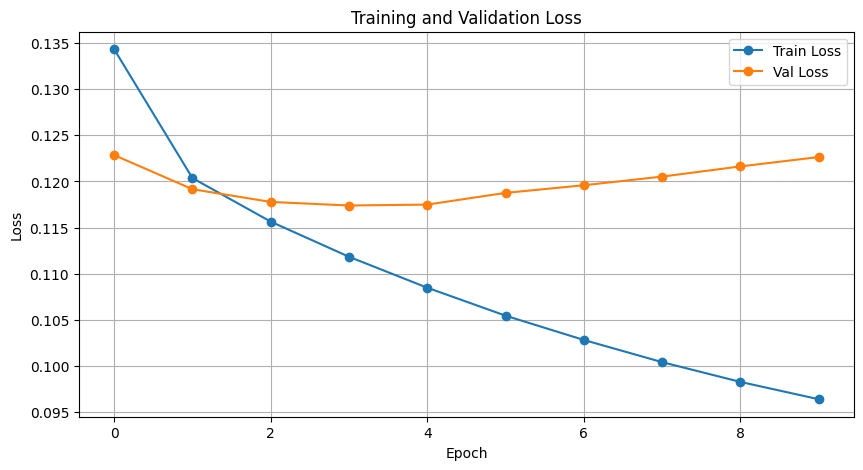

KeyError: 'val_macro_f1'

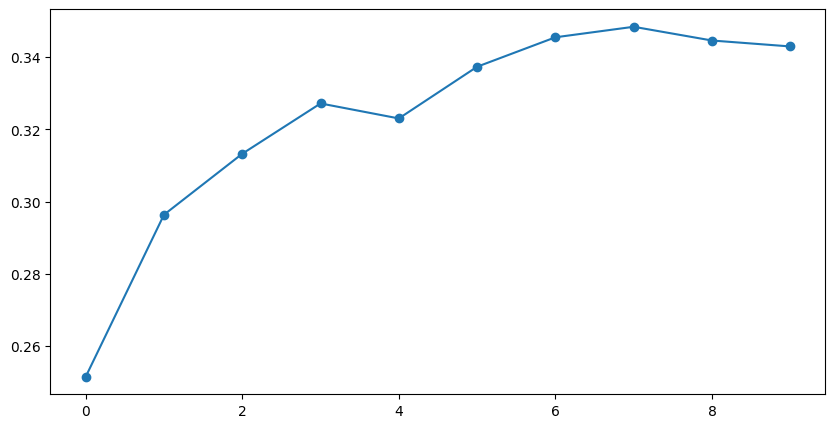

In [28]:
import matplotlib.pyplot as plt

# === Plot training & validation loss ===
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss', marker='o')
plt.plot(history['val_loss'], label='Val Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# === Plot validation Micro-F1 and Macro-F1 ===
plt.figure(figsize=(10, 5))
plt.plot(history['val_micro_f1'], label='Val Micro-F1', marker='o')
plt.plot(history['val_macro_f1'], label='Val Macro-F1', marker='o')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("Validation F1 Scores")
plt.legend()
plt.grid(True)
plt.show()


### Emapathetic Dialogues


In [ ]:

import kagglehub

# Download dataset
path = kagglehub.dataset_download("atharvjairath/empathetic-dialogues-facebook-ai")

print("Path to dataset files:", path)


100%|██████████| 3.26M/3.26M [00:00<00:00, 186MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvjairath/empathetic-dialogues-facebook-ai/versions/1


In [ ]:
import os

print("Path:", path)
print("Files:", os.listdir(path))


Path: /root/.cache/kagglehub/datasets/atharvjairath/empathetic-dialogues-facebook-ai/versions/1
Files: ['emotion-emotion_69k.csv']


### Peaking at the decoder datatset - csv file

In [ ]:
train_dec = pd.read_csv(os.path.join(path, "emotion-emotion_69k.csv"))
train_dec.head(5)



,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


In [ ]:
train_dec['emotion'].unique()

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated',
       ' I really killed it!', ' we were in a different country',
       't even like scary things',
       't believe I like the show Power so much. I was never really into shows like that',
       nan, ' time to jump on the motorcycle and go cruising!',
       " a boy.  I hear all these different labor stories that aren't exactly reassuring!  ",
       't believe my daughter taught herself how to play the ukelele. I was amazed',
       't think I wold like super heroes',
       "m so mad with my brother. He stole from me and didn't think I would notice. ",
       " but

In [ ]:
train_dec['empathetic_dialogues'].unique()

array(['Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :',
       'Customer :This was a best friend. I miss her.\nAgent :',
       'Customer :We no longer talk.\nAgent :', ...,
       "Customer :I woke up this morning to my wife telling me she's pregnant!\nAgent :",
       "Customer :It is soooo awesome.  We have been wanting a baby for so long.  I can't wait, but I was shocked out of a dead sleep!\nAgent :",
       "Customer :Oh hey that's awesome!  That is awesome right?\nAgent :"],
      dtype=object)

In [ ]:
import pandas as pd

empathetic = pd.read_csv(os.path.join(path, "emotion-emotion_69k.csv"))
print(len(empathetic['emotion'].unique()))
print(empathetic['emotion'].unique())


44
['sentimental' 'afraid' 'proud' 'faithful' 'terrified' 'joyful' 'angry'
 'sad' 'jealous' 'grateful' 'prepared' 'embarrassed' 'excited' 'annoyed'
 'lonely' 'ashamed' 'guilty' 'surprised' 'nostalgic' 'confident' 'furious'
 'disappointed' 'caring' 'trusting' 'disgusted' 'anticipating' 'anxious'
 'hopeful' 'content' 'impressed' 'apprehensive' 'devastated'
 ' I really killed it!' ' we were in a different country'
 't even like scary things'
 't believe I like the show Power so much. I was never really into shows like that'
 nan ' time to jump on the motorcycle and go cruising!'
 " a boy.  I hear all these different labor stories that aren't exactly reassuring!  "
 't believe my daughter taught herself how to play the ukelele. I was amazed'
 't think I wold like super heroes'
 "m so mad with my brother. He stole from me and didn't think I would notice. "
 " but what I didn't know was that he was working in the next room with the door open.  He approached and asked what I had been saying. 